In [11]:
# Tahap 1: Import ulang library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize

In [12]:
# Tahap 2–4: Load dan Preprocessing
df = pd.read_csv('/content/income.csv')
df['income'] = LabelEncoder().fit_transform(df['income'])
X = df.drop(columns='income')
y = df['income']
X_encoded = pd.get_dummies(X)

In [13]:
# Tahap 6–7: Split dan Standardisasi
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Tahap 8–9: Train Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_proba = knn.predict_proba(X_test_scaled)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
dt_proba = dt.predict_proba(X_test_scaled)


In [15]:
# Tahap 10: Evaluasi
def evaluate_model(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='macro'),
        "Recall": recall_score(y_true, y_pred, average='macro'),
        "F1-Score": f1_score(y_true, y_pred, average='macro'),
        # "AUC": roc_auc_score(y_true, y_proba[:, 1])  # binary case
    }

        # Hitung AUC hanya jika proba tersedia
    try:
        if target_type == 'binary':
            auc = roc_auc_score(y_true, y_proba)
        else:
            auc = roc_auc_score(y_true, y_proba, multi_class='ovr')
        metrics["AUC"] = auc
    except:
        metrics["AUC"] = None

    return metrics

knn_eval = evaluate_model(y_test, knn_pred, knn_proba)
dt_eval = evaluate_model(y_test, dt_pred, dt_proba)

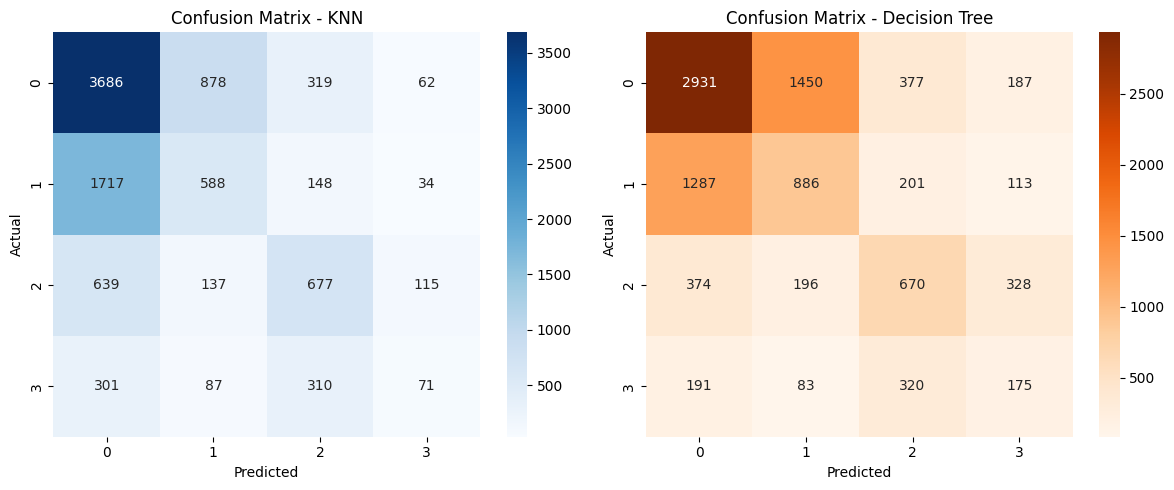

In [16]:
# Tahap 11: Confusion Matrix
plt.figure(figsize=(12, 5))

# KNN
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Decision Tree
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

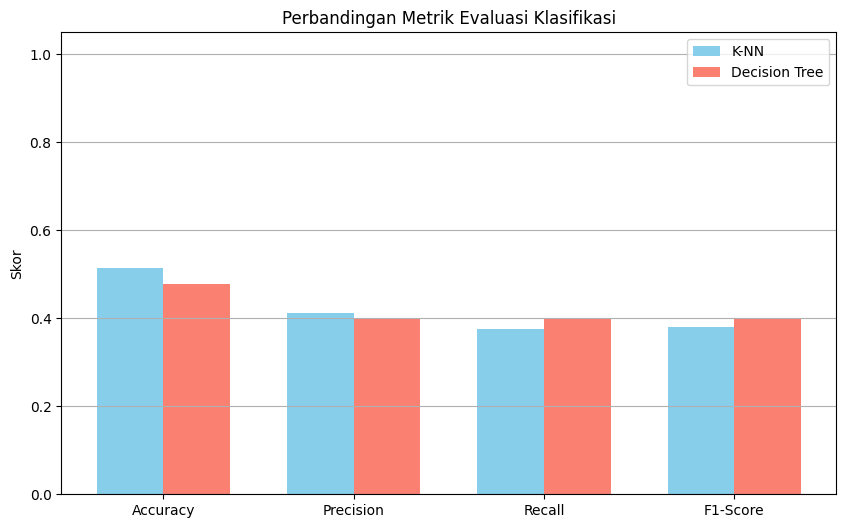

In [17]:

# Tahap 12: Grafik Perbandingan
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [knn_eval[m] for m in metrics]
dt_scores = [dt_eval[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, knn_scores, width, label='K-NN', color='skyblue')
plt.bar(x + width/2, dt_scores, width, label='Decision Tree', color='salmon')
plt.xticks(x, metrics)
plt.ylabel("Skor")
plt.ylim(0, 1.05)
plt.title("Perbandingan Metrik Evaluasi Klasifikasi")
plt.legend()
plt.grid(True, axis='y')
plt.show()

🧠 Penjelasan Matematis
🔹 K-Nearest Neighbors (K-NN) Classifier
K-NN adalah algoritma non-parametrik yang mengklasifikasikan data baru berdasarkan jarak ke data tetangga terdekat. Jarak yang paling umum digunakan adalah Euclidean Distance:

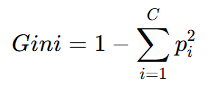

Setelah dihitung, algoritma mengambil mayoritas kelas dari K data terdekat untuk menentukan prediksi.

🔹 Decision Tree Classifier
Decision Tree membagi data berdasarkan fitur yang paling “informatif”. Fungsi yang umum digunakan untuk memutuskan pemisahan data adalah Gini Impurity:

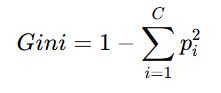

Semakin rendah nilai Gini setelah pemisahan, semakin baik split tersebut. Model akan terus membagi node hingga kondisi tertentu (misal: kedalaman maksimal, minimum sample, dsb).

🔹 Metrik Evaluasi Klasifikasi
Berikut adalah rumus evaluasi yang digunakan dalam klasifikasi:

🔹 Accuracy:

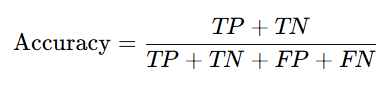

🔹 Precision:

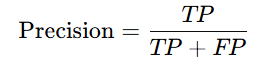

🔹 Recall:

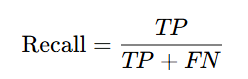

🔹 F1 Score:

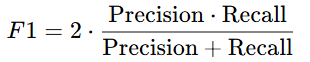

🔹 AUC (Area Under the Curve):
AUC mengukur luas di bawah kurva ROC (Receiver Operating Characteristic), yang menggambarkan trade-off antara True Positive Rate dan False Positive Rate.

